In [36]:
from sklearn import neighbors, metrics,svm, datasets, preprocessing, model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [37]:
# Charger les données
df = pd.read_csv('heart.csv')

In [38]:
df.head(5)

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal normal; fixed defect; reversable defect,Variable to be predicted
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   age                                            270 non-null    float64
 1   sex                                            270 non-null    float64
 2   chest pain type                                270 non-null    float64
 3   resting blood pressure                         270 non-null    float64
 4   serum cholestoral in mg/dl                     270 non-null    float64
 5   fasting blood sugar                            270 non-null    float64
 6   resting electrocardiographic results           270 non-null    float64
 7   maximum heart rate achieved                    270 non-null    float64
 8   exercise induced angina                        270 non-null    float64
 9   oldpeak                                        270 non

In [40]:
# Regarder les données manquantes

data.columns = ['age', 'sex', 'chest pain type', 'resting blood pressure','serum cholestoral','fasting blood sugar','resting electrocardiographic results', 'maximum heart rate achieved', 'exercise induced angina', 'oldpeak', 'the slope of the peak exercise ST segment', 'number of major vessels (0-3) colored by flourosopy', 'thal fixed reversable defect', 'Variable to be predicted']
data.isnull().sum()

age                                                    0
sex                                                    0
chest pain type                                        0
resting blood pressure                                 0
serum cholestoral                                      0
fasting blood sugar                                    0
resting electrocardiographic results                   0
maximum heart rate achieved                            0
exercise induced angina                                0
oldpeak                                                0
the slope of the peak exercise ST segment              0
number of major vessels (0-3) colored by flourosopy    0
thal fixed reversable defect                           0
Variable to be predicted                               0
dtype: int64

In [41]:
# On separe le jeu de donnée en 2 sous-jeu de donnée X et Y
from sklearn import preprocessing

X = data.iloc[:,:13].values
y = data.iloc[:,13:].values

In [42]:
print(X.shape)
print(y.shape)

(270, 13)
(270, 1)


In [43]:
### Simulation de données en deux dimensions séparables linéairement
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5,stratify=y, random_state=1) #

model = StandardScaler() 
X_train = model.fit_transform(X_train) 
#X_train = model.transform(X_train) 
X_test = model.transform(X_test) 

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 13)
(135, 13)
(135, 1)
(135, 1)


In [45]:
score = 'accuracy'
param_grid_RandForest = { 
    'n_estimators': [5, 10, 50, 100],
    'criterion' :['gini', 'entropy']
}
CV_rfc = model_selection.GridSearchCV(
    RandomForestClassifier(), # un classifieur Random Forest
    param_grid_RandForest,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
CV_rfc.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [5, 10, 50, 100]},
             scoring='accuracy')

In [46]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:") 
print(CV_rfc.best_params_)
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        CV_rfc.cv_results_['mean_test_score'], # score moyen
        CV_rfc.cv_results_['std_test_score'],  # écart-type du score
        CV_rfc.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'criterion': 'entropy', 'n_estimators': 5}
Résultats de la validation croisée :
accuracy = 0.748 (+/-0.236) for {'criterion': 'gini', 'n_estimators': 5}
accuracy = 0.785 (+/-0.098) for {'criterion': 'gini', 'n_estimators': 10}
accuracy = 0.807 (+/-0.086) for {'criterion': 'gini', 'n_estimators': 50}
accuracy = 0.785 (+/-0.098) for {'criterion': 'gini', 'n_estimators': 100}
accuracy = 0.815 (+/-0.105) for {'criterion': 'entropy', 'n_estimators': 5}
accuracy = 0.800 (+/-0.137) for {'criterion': 'entropy', 'n_estimators': 10}
accuracy = 0.800 (+/-0.111) for {'criterion': 'entropy', 'n_estimators': 50}
accuracy = 0.800 (+/-0.111) for {'criterion': 'entropy', 'n_estimators': 100}


In [47]:
final_model_RandForest = CV_rfc.best_estimator_
y_pred_RF = final_model_RandForest.predict(X_test)

result1 = classification_report(y_test, y_pred_RF)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_RF)
print("Accuracy score:",)
print(result2)


Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.84      0.85        75
           2       0.80      0.82      0.81        60

    accuracy                           0.83       135
   macro avg       0.83      0.83      0.83       135
weighted avg       0.83      0.83      0.83       135

Accuracy score:
0.8296296296296296


Matrice de confusion:


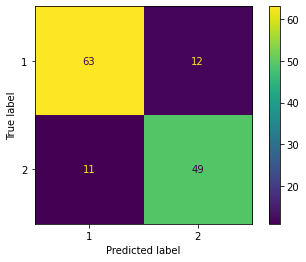

In [48]:
print("Matrice de confusion:")
plot_confusion_matrix(final_model_RandForest, X_test, y_test)